# Stereometry Notebook

## Preliminaries

In [9]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os

## Processing raw data

### Declaring functions

In [51]:
# ======================================================
# 1. Detect green dots in one image
# ======================================================
def detect_green_dots(image_path):
    """
    Detect neon-green dots in an image using HSV thresholding + connected components.
    Returns a list of (x, y) centroids.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")

    # Convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define HSV threshold range for neon green points
    lower_green = np.array([40, 100, 100])
    upper_green = np.array([80, 255, 255])

    # Apply threshold
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Morphological cleaning
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Connected components
    num, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

    points = []
    for i in range(1, num):  # skip background
        cx, cy = centroids[i]
        points.append((int(cx), int(cy)))

    return points

def detect_red_dots(image_path):
    """
    Detect neon-green dots in an image using HSV thresholding + connected components.
    Returns a list of (x, y) centroids.
    """
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")

    # Convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define HSV threshold range for neon green points
    lower_red = np.array([160, 100, 100])
    upper_red = np.array([179, 255, 255])

    # Apply threshold
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Morphological cleaning
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Connected components
    num, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

    points = []
    for i in range(1, num):  # skip background
        cx, cy = centroids[i]
        points.append((int(cx), int(cy)))

    return points


# ======================================================
# 2. Process images (single file or folder)
# ======================================================
def process_images(input_path, output_folder="detections"):
    """
    Process either a single image or all images in a folder.
    Each image produces its own CSV with detected green dots.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Case 1: single image
    if os.path.isfile(input_path):
        files = [input_path]

    # Case 2: folder of images
    elif os.path.isdir(input_path):
        files = [
            os.path.join(input_path, f)
            for f in os.listdir(input_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp'))
        ]
    else:
        raise ValueError(f"Path not found: {input_path}")

    for f in files:
        if "r" in f:
            try:
                detections = detect_red_dots(f)
            except Exception as e:
                print(f"❌ Error processing {f}: {e}")
                continue
        else: 
            try:
                detections = detect_green_dots(f)
            except Exception as e:
                print(f"❌ Error processing {f}: {e}")
                continue

        out_name = os.path.splitext(os.path.basename(f))[0] + ".csv"
        out_path = os.path.join(output_folder, out_name)

        df = pd.DataFrame(detections, columns=["x0", "y0"])
        df.to_csv(out_path, index=False)

        print(f"✅ Processed {f}, found {len(df)} dots → saved {out_path}")


### Calling functions

In [52]:
for i in range(3, 10):
    process_images(f"pics/{i}.jpg")
    process_images(f"pics/{i}r.jpg")

✅ Processed pics/3.jpg, found 33 dots → saved detections\3.csv
✅ Processed pics/3r.jpg, found 17 dots → saved detections\3r.csv
✅ Processed pics/4.jpg, found 33 dots → saved detections\4.csv
✅ Processed pics/4r.jpg, found 16 dots → saved detections\4r.csv
✅ Processed pics/5.jpg, found 33 dots → saved detections\5.csv
✅ Processed pics/5r.jpg, found 17 dots → saved detections\5r.csv
✅ Processed pics/6.jpg, found 33 dots → saved detections\6.csv
✅ Processed pics/6r.jpg, found 14 dots → saved detections\6r.csv
✅ Processed pics/7.jpg, found 33 dots → saved detections\7.csv
✅ Processed pics/7r.jpg, found 16 dots → saved detections\7r.csv
✅ Processed pics/8.jpg, found 33 dots → saved detections\8.csv
✅ Processed pics/8r.jpg, found 12 dots → saved detections\8r.csv
✅ Processed pics/9.jpg, found 33 dots → saved detections\9.csv
✅ Processed pics/9r.jpg, found 13 dots → saved detections\9r.csv


## Functionalizing equation
We are given the formula:
$$ Z = \frac{bf}{x_1 - x_2}. $$

In [26]:
# Define function from equation above
def z_solver(x1, x2, b, f):
    return (b*f)/(x1-x2)

## Coordinates of Sample Points

In [56]:
filename = "3.csv"
file_path = os.path.join(os.getcwd(), "detections", filename)

Data = pd.read_csv(file_path)

for i in range(4, 10):
    
    filename = f"{i}.csv"
    file_path = os.path.join(os.getcwd(), "detections", filename)
    df = pd.read_csv(file_path)
    
    Data[f"x{i-3}"] = df['x0']

Data = Data[['y0', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']]

### For -r pictures

filename = "3r.csv"
file_path = os.path.join(os.getcwd(), "detections", filename)

rData = pd.read_csv(file_path)

for i in range(4, 10):
    
    filename = f"{i}r.csv"
    file_path = os.path.join(os.getcwd(), "detections", filename)
    df = pd.read_csv(file_path)
    
    rData[f"x{i-3}"] = df['x0']

In [80]:
Data = Data[:21]
Data.head()

,y0,x0,x1,x2,x3,x4,x5,x6
0,203,253,436,567,396,460,500,611
1,217,1975,2156,2308,1314,1374,1410,1519
2,626,1191,1334,1445,840,888,913,1007
3,723,627,791,919,573,632,664,767
4,732,1670,1831,1971,1128,1184,1220,1323


In [130]:
arr0 = Data['y0'].to_numpy()
arr1 = Data['x0'].to_numpy()
arr2 = Data['x1'].to_numpy()

arr0 = np.reshape(arr0, (7, 3))
arr1 = np.reshape(arr1, (7, 3))
arr2 = np.reshape(arr2, (7, 3))

## TESTING

In [131]:
# focal length of camera
f = 200
# camera transverse distance
b = 100
# position of points in reference images
num_pts = 10
c = 128

# convert to numpy arrays
x1 = arr1
x2 = arr2
y = arr0
# calculation of depth
Z = b * f / (x2 - x1)

# 3D Position Calculation
X = (x1 - c) * (Z / f)
Y = (y - c) * (Z / f)

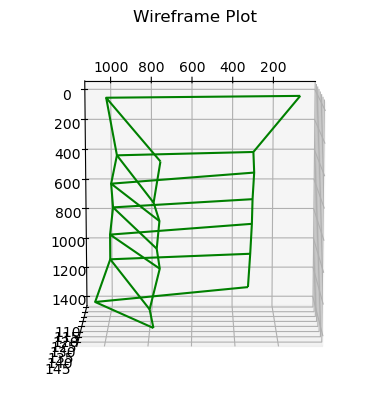

In [132]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_title('Wireframe Plot')

ax.view_init(100, 90, 0)
plt.show()